In [1]:
using Pkg
Pkg.activate("./one_flav_env")

import DelimitedFiles: readdlm
using PythonPlot
using LaTeXStrings
using NaturallyUnitful

const xsec_conv = ustrip(unnatural(u"pb", 1*u"GeV^-2"))

figdir = "./figs/"

rc("font", family="serif", serif="Computer Modern", size=14)
rc("figure", autolayout=true)
rc("axes", labelsize=16, unicode_minus=false)
rc("text", usetex=true)

function load_madgraph(file::String)
    Vector{Float64}(readdlm(file, skipstart=1)[:,3])
end
;

  Activating project at `~/Dropbox (University of Oregon)/MuC/Aria/one_flav/code/julia/one_flav_env`


In [2]:
include("./one_flav_model.jl")
import .OneFlavor: LFDM, σ_AA_to_φφ, σ_ee_to_φφ, σ_ZZ_to_φφ, σ_WW_to_φφ

include("./muon_pdf.jl")
import .MuPDF: σ_hadronize
;

In [3]:
function σ_hadr(σfunc, α, model, partonid, Q2pdf)
    σ_hadronize(x -> σfunc(x, model), α, 4/α, partonid, Q2pdf)
end
;

### PDFs

In [20]:
mphis = 10 .^ range(2, log10(5e3), 100)[1:end-1]
mu_xsec = load_madgraph("./mg_xsecs/xsec_mumu_phiphi.txt")
vv_xsec = load_madgraph("./mg_xsecs/xsec_AZAZ_phiphi.txt")
ww_xsec = load_madgraph("./mg_xsecs/xsec_WW_phiphi.txt")
;

In [21]:
rts = 10e3 # GeV
alphas = rts^2 ./ mphis .^ 2
models = LFDM.(0.0, mphis, 0.0)
;

In [22]:
mu_xsec_theory = σ_ee_to_φφ.(alphas, models) .* xsec_conv ./ (mphis .^2)

AA_xsec_theory = σ_hadr.(σ_AA_to_φφ, alphas, models, 22, (OneFlavor.mZ)^2) .* xsec_conv ./ (mphis .^2)
ZZ_xsec_theory = σ_hadr.(σ_ZZ_to_φφ, alphas, models, 23, (OneFlavor.mZ)^2) .* xsec_conv ./ (mphis .^2)
WW_xsec_theory = σ_hadr.(σ_WW_to_φφ, alphas, models, 24, (OneFlavor.mZ)^2) .* xsec_conv ./ (mphis .^2)

VV_xsec_theory = AA_xsec_theory .+ ZZ_xsec_theory
;

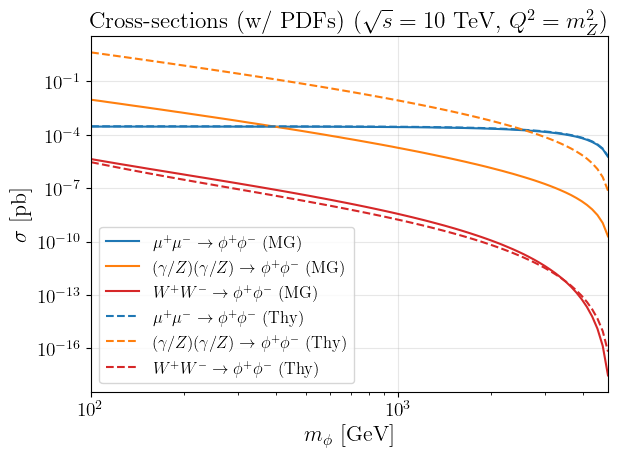

In [28]:
fig = figure()

plot(mphis, mu_xsec, color="tab:blue", label=L"$\mu^+ \mu^- \to \phi^+ \phi^-$ (MG)")
plot(mphis, vv_xsec, color="tab:orange", label=L"$(\gamma/Z) (\gamma/Z) \to \phi^+ \phi^-$ (MG)")
plot(mphis, ww_xsec, color="tab:red", label=L"$W^+ W^- \to \phi^+ \phi^-$ (MG)")

plot(mphis, mu_xsec_theory, ls="dashed", color="tab:blue", label=L"$\mu^+ \mu^- \to \phi^+ \phi^-$ (Thy)")
plot(mphis, VV_xsec_theory, ls="dashed", color="tab:orange", label=L"$(\gamma/Z) (\gamma/Z) \to \phi^+ \phi^-$ (Thy)")
plot(mphis, WW_xsec_theory, ls="dashed", color="tab:red", label=L"$W^+ W^- \to \phi^+ \phi^-$ (Thy)")

xscale("log")
yscale("log")

xlim(1e2, mphis[end])

grid(alpha=0.3)

xlabel(L"$m_\phi$ [GeV]")
ylabel(L"$\sigma$ [pb]")
title(L"Cross-sections (w/ PDFs) ($\sqrt{s} = 10$ TeV, $Q^2 = m_Z^2$)")

legend(fontsize=12)

plotclose()
# fig.savefig(figdir * "xsecs_wrong.pdf")
fig

### No PDFs

In [4]:
mphis = 10 .^ range(2, log10(5e3), 100)[1:end-1]
mu_xsec = load_madgraph("./mg_xsecs/xsec_mumu_phiphi.txt")
aa_xsec_np = load_madgraph("./mg_xsecs/xsec_AA_phiphi_nopdf.txt")
az_xsec_np = load_madgraph("./mg_xsecs/xsec_AZ_phiphi_nopdf.txt")
zz_xsec_np = load_madgraph("./mg_xsecs/xsec_ZZ_phiphi_nopdf.txt")
ww_xsec_np = load_madgraph("./mg_xsecs/xsec_WW_phiphi_nopdf.txt")
;

In [5]:
rts = 10e3 # GeV
alphas = rts^2 ./ mphis .^ 2
models = LFDM.(0.0, mphis, 0.0)

mu_xsec_theory = σ_ee_to_φφ.(alphas, models) .* xsec_conv ./ (mphis .^2)
aa_xsec_theory_np = σ_AA_to_φφ.(alphas, models) .* xsec_conv ./ (mphis .^2)
zz_xsec_theory_np = σ_ZZ_to_φφ.(alphas, models) .* xsec_conv ./ (mphis .^2)
ww_xsec_theory_np = σ_WW_to_φφ.(alphas, models) .* xsec_conv ./ (mphis .^2)
;

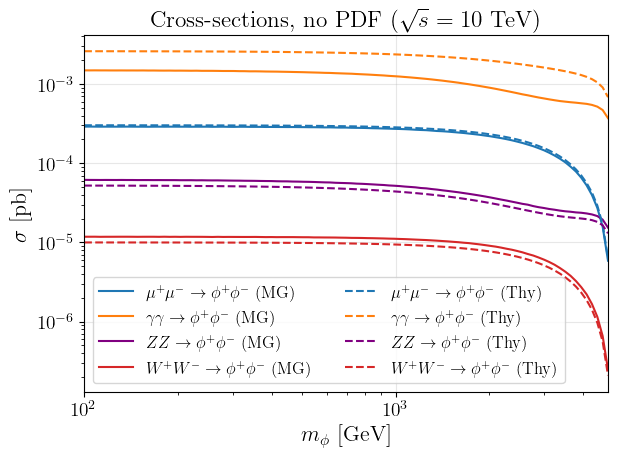

In [10]:
fig2 = figure()

plot(mphis, mu_xsec, color="tab:blue", label=L"$\mu^+ \mu^- \to \phi^+ \phi^-$ (MG)")
plot(mphis, aa_xsec_np, color="tab:orange", label=L"$\gamma \gamma \to \phi^+ \phi^-$ (MG)")
plot(mphis, zz_xsec_np, color="purple", label=L"$Z Z \to \phi^+ \phi^-$ (MG)")
plot(mphis, ww_xsec_np, color="tab:red", label=L"$W^+ W^- \to \phi^+ \phi^-$ (MG)")

plot(mphis, mu_xsec_theory, ls="dashed", color="tab:blue", label=L"$\mu^+ \mu^- \to \phi^+ \phi^-$ (Thy)")
plot(mphis, aa_xsec_theory_np, ls="dashed", color="tab:orange", label=L"$\gamma \gamma \to \phi^+ \phi^-$ (Thy)")
plot(mphis, zz_xsec_theory_np, ls="dashed", color="purple", label=L"$Z Z \to \phi^+ \phi^-$ (Thy)")
plot(mphis, ww_xsec_theory_np, ls="dashed", color="tab:red", label=L"$W^+ W^- \to \phi^+ \phi^-$ (Thy)")

xscale("log")
yscale("log")

xlim(1e2, mphis[end])

grid(alpha=0.3)

xlabel(L"$m_\phi$ [GeV]")
ylabel(L"$\sigma$ [pb]")
title(L"Cross-sections, no PDF ($\sqrt{s} = 10$ TeV)")

legend(fontsize=12, ncol=2, loc="lower left")

plotclose()
# fig2.savefig(figdir * "xsecs_nopdf.pdf")
fig2

### $Z \phi \phi$ Coupling Dependence

In [1]:
gZφφ = range(-1, 1, 1000)

f16 = figure()

axvline(gR, color="slateblue", linestyle="dashed", alpha=0.5, label=L"e_R \: [e s_w / c_w]")
axvline(gL, color="red", linestyle="dashed", alpha=0.5, label=L"e_L \: [e (s_w^2-1/2) / s_w c_w]")
axvline(gv, color="grey", linestyle="dashed", alpha=0.5, label=L"\tilde{\nu} \: [e / 2 s_w c_w]")

plot(gZφφ, [σ_WW_to_φφ_2((10/3)^2, LFDM(0.0, 3e3, 0.0), g_Zφφ=g) for g in gZφφ] .* xsec_conv ./ (3e3)^2,
    color="tab:blue", label=L"WW \to \phi \phi")
plot(gZφφ, [σ_ZZ_to_φφ_2((10/3)^2, LFDM(0.0, 3e3, 0.0), g_Zφφ=g) for g in gZφφ] .* xsec_conv ./ (3e3)^2,
    color="tab:orange", label=L"ZZ \to \phi \phi")

xscale("log")
yscale("log")

xlabel(L"$Z \phi \phi$ coupling")
ylabel(L"$\sigma$ [pb]")

xlim(gZφφ[1], gZφφ[end])
# ylim(5e2, 5e4)

title(L"$Z \phi \phi$ coupling ($m_\phi = 3$ TeV, $\sqrt{s} = 10$ TeV)")

grid(alpha=0.3)

legend()

plotclose()
# f16.savefig(figdir * "xsec_vs_Zphiphi.pdf")
f16

UndefVarError: UndefVarError: `figure` not defined